好用工具：

* https://stackoverflow.com/questions/34702815/pandas-group-by-and-pivot-table-difference

注意事項：
* 如果畫圖出現中文亂碼：https://blog.csdn.net/fwj_ntu/article/details/105598145

# 套件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
from scipy import stats

In [20]:
occupation_dict = {
    1: "營造／礦砂業",
    2: "製造業",
    3: "水電燃氣業",
    4: "批發／零售／貿易商",
    5: "旅宿／餐飲",
    6: "運輸倉儲",
    7: "農／林／漁／牧",
    8: "金融保險",
    9: "不動產／租賃",
    10: "軍／警／消",
    11: "公務人員",
    12: "律師／會計師／地政士",
    13: "醫藥服務",
    14: "休閒服務",
    15: "其他／家管",
    16: "自由業",
    17: "投資／自營商",
    18: "媒體文教",
    19: "學生",
    20: "學校教師（含行政人員）",
    21: "資訊科技",
    22: "公證人或記帳士",
    23: "國防工業",
    24: "投資或稅務顧問公司",
    25: "不動產仲介／代銷商",
    26: "大宗物資貿易商",
    27: "博弈業（網路／實體）",
    28: "八大特種行業",
    29: "宗教、慈善、基金會",
    30: "銀樓、珠寶商",
    31: "藝術品或古董買賣商",
    32: "當鋪",
    33: "實體或虛擬貨幣兌換所"
}

In [15]:
# 選擇你要的欄位
selected_columns = [
    
    # yes/no
    'sex',
    'isReject',
    'hasOtherComAccount',

    # categorical
    # 'bid',
    'source',
    'occupation',
    # 'company',
    'eduLevel',

    # numerical-like
    'expInvestment', 
    'yrsInvestment', 
    'frqInvestment',
    'srcCapital',
    'quotaCredit',
    'incomeYear',
    'totalWealth',
    
    # 'quota_origin',
    'quota_now'
]


# data = pd.read_csv('./data/data.csv') # 載入資料
data = pd.read_csv('./data/ooa_features_v1.csv') # 載入資料
data = data[selected_columns] # 選擇欄位
data = data.dropna() # 移除空值列
data = data[selected_columns]
data = data[data['quota_now']<=1e6]
data = data[data['isReject']==0]
data = data.drop('isReject', axis=1)
data = data[data['source']!='Anue']
data = data[data['occupation'] <= 33]
data = data.dropna()

In [3]:
def to_class(x):
    '''
    0~10萬
    10~30萬(不含10萬)
    30~50萬(不含30萬)
    50~100萬(不含50萬)
    '''
    if x < 1E5:
        return 0
    if 1E5 <= x and x < 3E5:
        return 1
    if 3E5 <= x and x < 5E5:
        return 2
    else:
        return 3

In [4]:
yushan = data[data['source'] == '玉證']
fugle = data[data['source'] == 'FUGLE']
yushan['y'] = yushan['quota_now'].apply(lambda x: to_class(x))
fugle['y'] = fugle['quota_now'].apply(lambda x: to_class(x))

<ipython-input-4-da5a6a74fd14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yushan['y'] = yushan['quota_now'].apply(lambda x: to_class(x))
<ipython-input-4-da5a6a74fd14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fugle['y'] = fugle['quota_now'].apply(lambda x: to_class(x))


# 分析data

## 各欄位分佈

<ipython-input-6-28fef06665a7>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax, bins=20)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


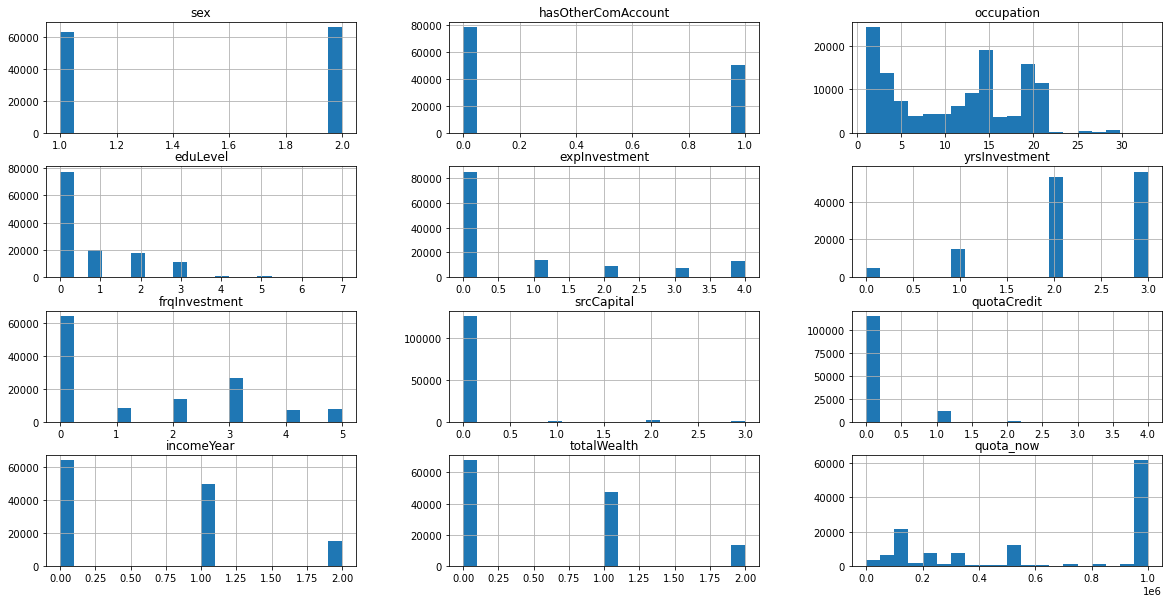

<ipython-input-6-28fef06665a7>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yushan.hist(ax=ax, bins=20)


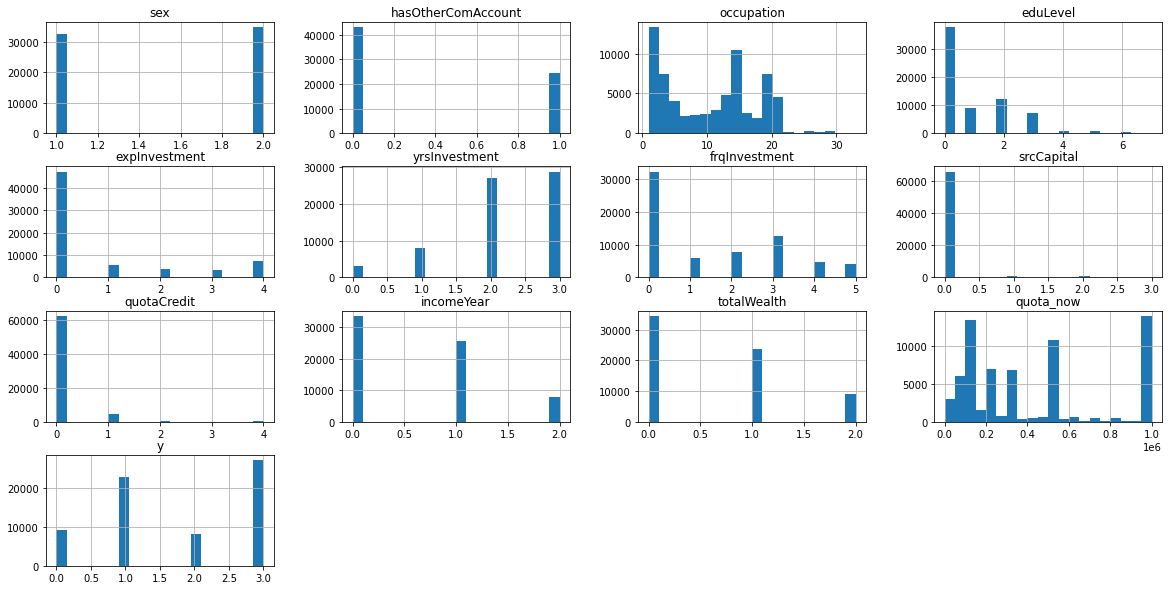

<ipython-input-6-28fef06665a7>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  fugle.hist(ax=ax, bins=20)


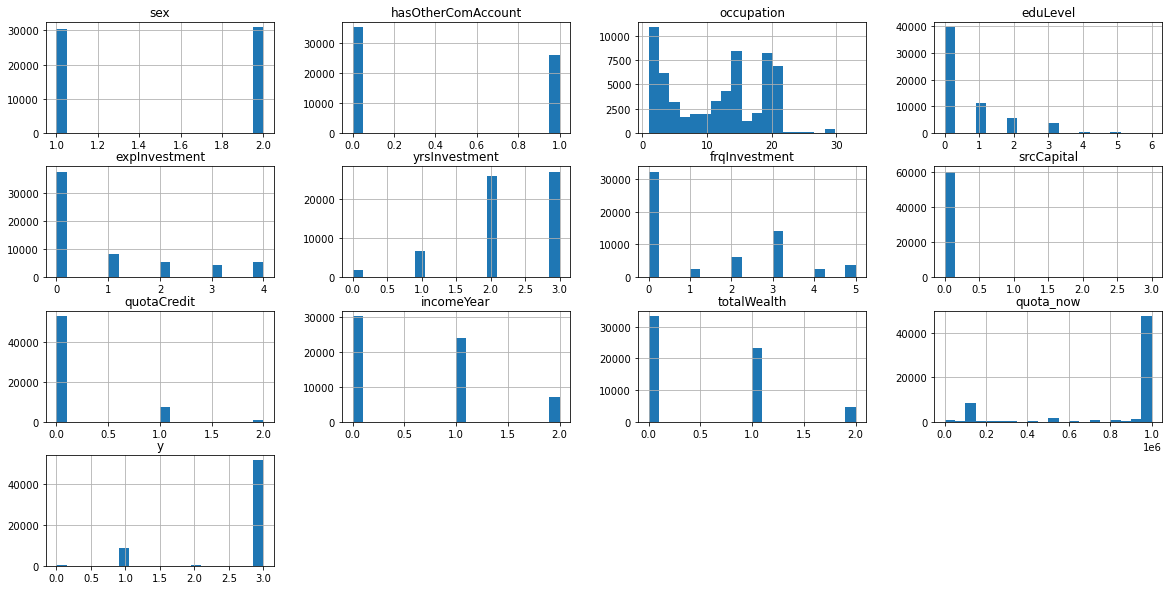

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
data.hist(ax=ax, bins=20)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(20, 10))
yushan.hist(ax=ax, bins=20)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(20, 10))
fugle.hist(ax=ax, bins=20)
plt.show()
plt.close()

## 產業 v.s. 開戶

In [7]:
pd.pivot_table(data=data, index="occupation", columns="source", values="quota_now", aggfunc=['count', 'mean', 'std'])

count                  mean                           std  \
source     FUGLE     玉證          FUGLE             玉證          FUGLE   
occupation                                                             
1.0         1578   1836  954480.354880  414700.435730  166195.490186   
2.0         9274  11453  956304.722881  397393.695975  161538.843959   
3.0          474    544  954978.902954  389944.852941  170126.490617   
4.0         5680   6934  958359.154930  428565.041823  161129.087163   
5.0         3239   4064  954257.486879  336697.834646  170328.488773   
6.0         1401   1698  956538.187009  377420.494700  161239.197217   
7.0          295    433  947355.932203  499907.621247  188054.283912   
8.0         1961   2339  955374.808771  484194.100043  158439.052718   
9.0          406    631  956280.788177  491568.938193  173419.380281   
10.0        1594   1748  945301.129235  374502.288330  183402.153592   
11.0        2814   2445  962192.608387  461513.292434  148107.352912   
12.0         537    454  937337.057728  475440.528634  211679.901226   
13.0        4336   4767  955740.313653  447201.594294  164136.567602   
14.0        2339   2815  956075.245832  356873.889876  168296.159835   
15.0        6122   7617  488748.774910  409415.780491  428915.536096   
16.0        1222   2535  606914.893617  395250.493097  433235.044434   
17.0         389    540  901182.519280  534962.962963  260595.353470   
18.0        1691   1345  964192.785334  435055.762082  143736.636944   
19.0        5606   4585  250840.171245  238778.625954  321258.881603   
20.0        2630   2895  959262.357414  457965.457686  164291.728783   
21.0        6888   4606  962180.603949  470768.562744  147446.710713   
22.0          63     82  881904.761905  395975.609756  297353.146964   
23.0          61     51  940163.934426  334117.647059  200170.692188   
24.0          77     61  934545.454545  565081.967213  214681.805265   
25.0         128    212  945312.500000  520330.188679  201220.439703   
26.0          30     27  900000.000000  511111.111111  266522.949778   
27.0          28     48  703571.428571  304375.000000  417649.634181   
28.0          34     60  893823.529412  247833.333333  268373.492638   
29.0         375    326  859093.333333  391656.441718  309656.924760   
30.0          22     48  906818.181818  449166.666667  272683.077227   
31.0          24     28  804583.333333  405714.285714  389737.695142   
32.0           4     11  950000.000000  289090.909091  100000.000000   
33.0           7     10  742857.142857  329000.000000  439155.032827   

                           
source                 玉證  
occupation                 
1.0         338229.993852  
2.0         336579.679058  
3.0         325663.222834  
4.0         358166.803504  
5.0         321819.634531  
6.0         330750.919503  
7.0         364445.279592  
8.0         355235.289849  
9.0         355206.952311  
10.0        327147.098993  
11.0        349504.091523  
12.0        370895.527124  
13.0        367365.971308  
14.0        325692.248505  
15.0        343680.970957  
16.0        342511.855167  
17.0        360057.455885  
18.0        353373.643833  
19.0        288977.994048  
20.0        360543.491183  
21.0        360285.409630  
22.0        348456.418998  
23.0        299774.424997  
24.0        372557.033445  
25.0        364608.969837  
26.0        360835.924074  
27.0        292944.742811  
28.0        231334.314298  
29.0        341689.492517  
30.0        377961.122246  
31.0        308993.929839  
32.0        122837.660793  
33.0        211263.395368

## 相關性分析

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


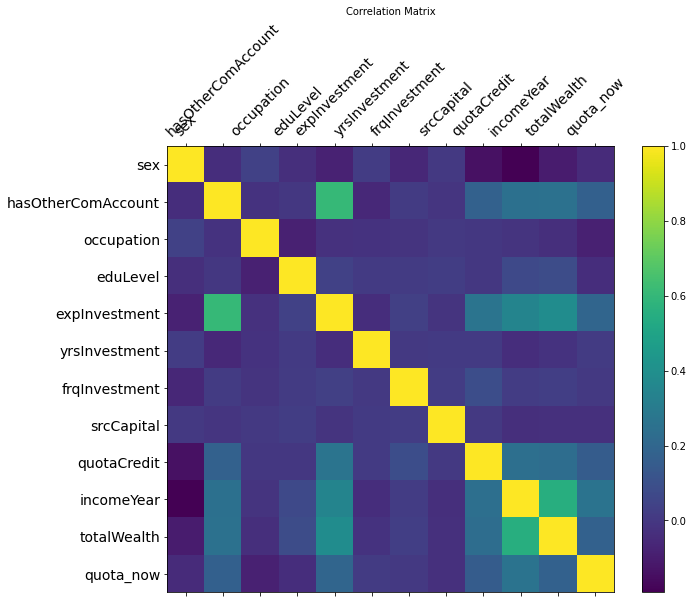

In [5]:
# pearson coefficient
corr = data.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

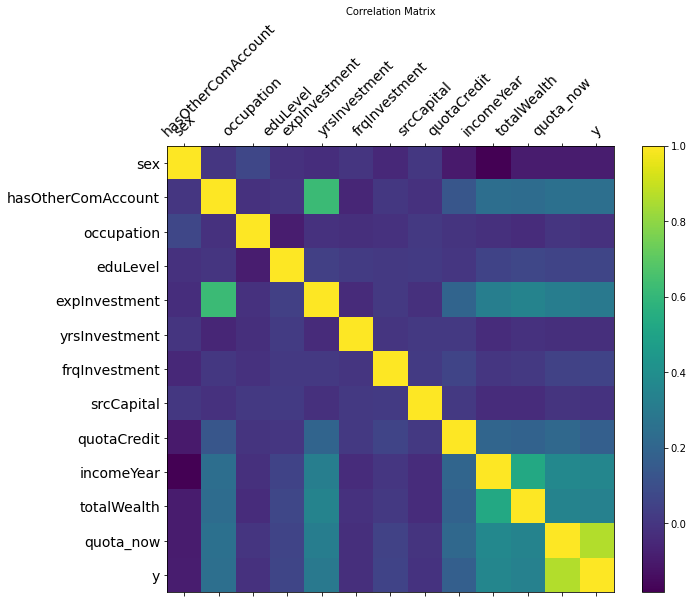

In [25]:
# pearson coefficient
corr = yushan.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(yushan.corr(), fignum=f.number)
plt.xticks(range(yushan.select_dtypes(['number']).shape[1]), yushan.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(yushan.select_dtypes(['number']).shape[1]), yushan.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

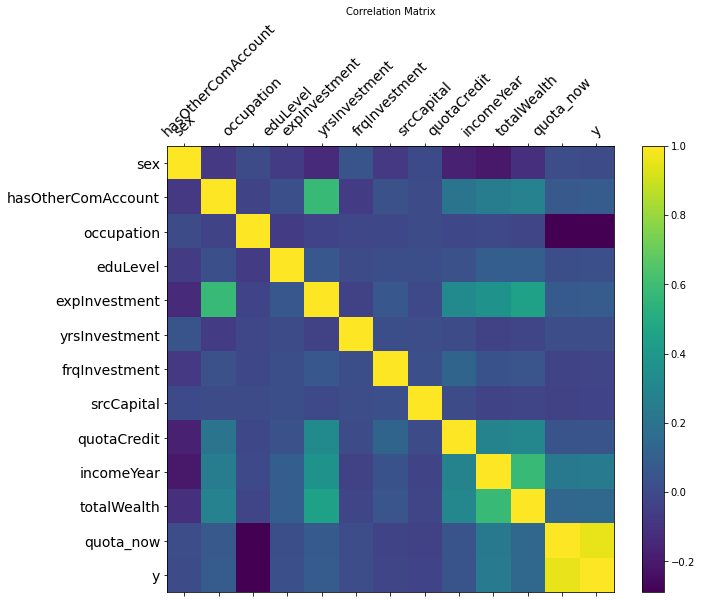

In [26]:
# pearson coefficient
corr = fugle.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(fugle.corr(), fignum=f.number)
plt.xticks(range(fugle.select_dtypes(['number']).shape[1]), fugle.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(fugle.select_dtypes(['number']).shape[1]), fugle.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

## 各欄位 v.s. quota_now

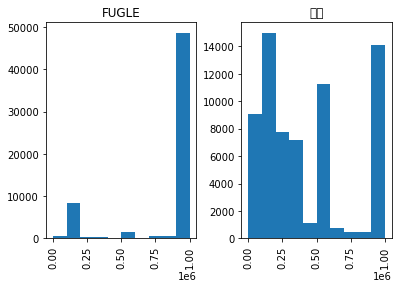

In [28]:
data.hist(column='quota_now', by='source')
plt.show()
plt.close()

/home/jack/miniconda3/envs/ml/lib/python3.9/site-packages/pandas/plotting/_matplotlib/hist.py:396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


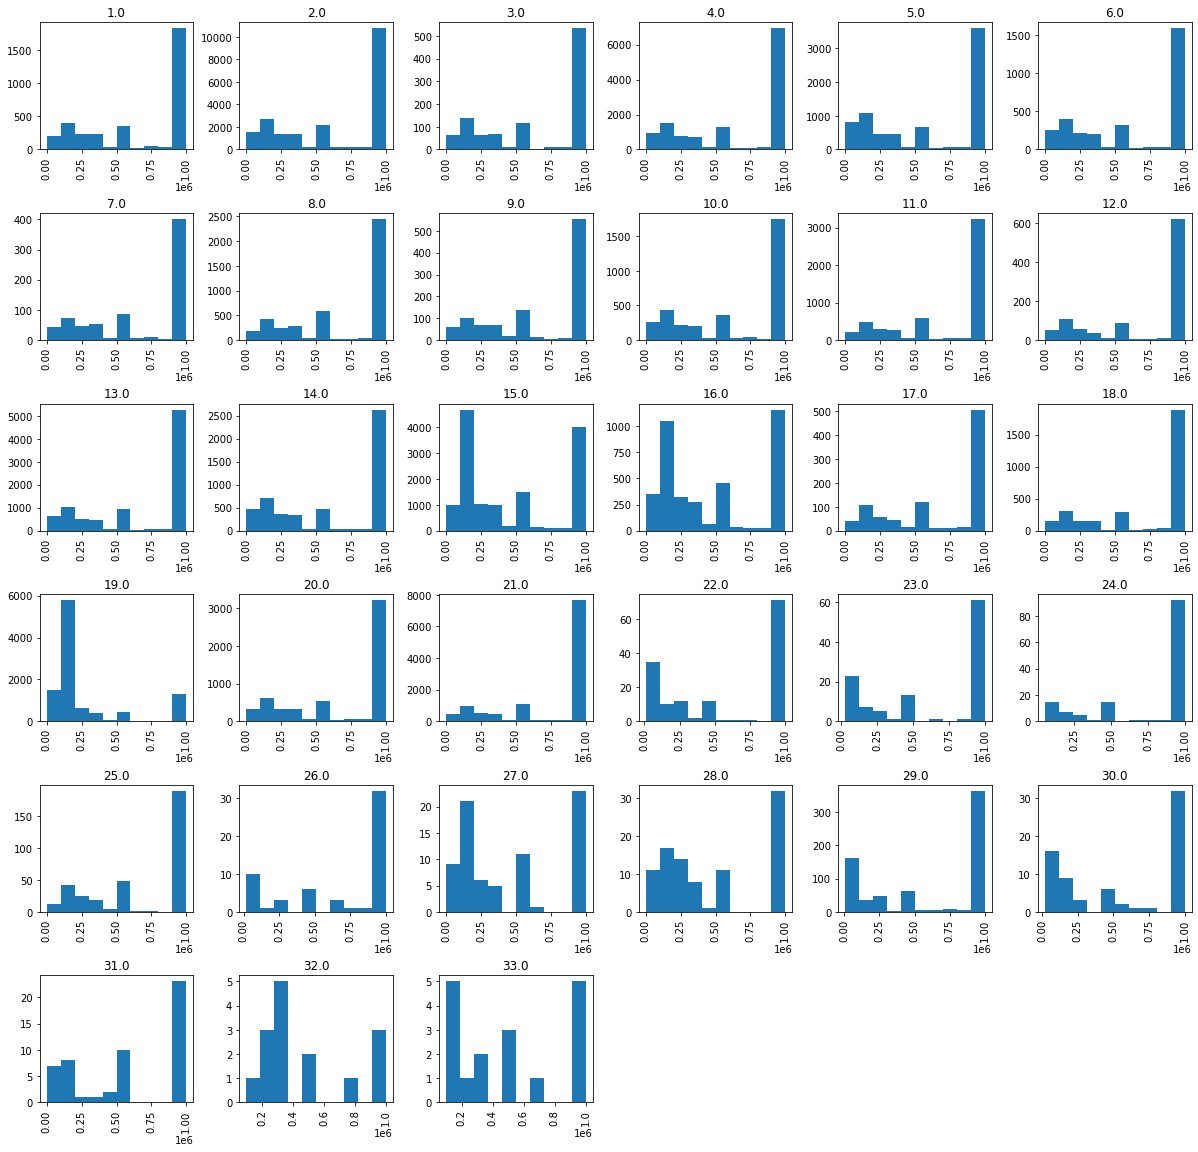

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))
data.hist(column='quota_now', by='occupation', ax=ax)
plt.show()
plt.close()

# 分析credit

In [13]:
names = [
    '身分證號',
    '分公司代碼',
    '違約',
    '普通戶開戶數',
    '信用戶開戶數',
    '疑似洗錢註記',
    '融資總餘額-萬元',
    '融券總餘額-萬元',
    '單日買賣最高額度-萬',
    '期貨市場開戶數',
    '借貸款項契約數',
    '現股當沖開戶數']
credit = pd.read_csv('./data/credit.csv', names=names, skiprows=1)
# credit = pd.read_csv('./data/credit.csv')
credit

,,身分證號,分公司代碼,違約,普通戶開戶數,信用戶開戶數,疑似洗錢註記,融資總餘額-萬元,融券總餘額-萬元,單日買賣最高額度-萬,期貨市場開戶數,借貸款項契約數,現股當沖開戶數
140289368C,884AZ,2021-12-14,20211214,N,1,0,0,0,0,N,0,0,0
190354142C,884Z,2022-01-18,20220118,N,0,0,0,0,0,N,0,0,0
170393481C,884Y,2021-12-03,20211203,N,1,0,0,0,200,N,0,1,1
170431289C,884W,2021-09-09,20210909,N,0,0,0,0,0,N,0,0,0
142005435C,884AZ,2022-01-20,20220120,N,0,0,0,0,0,N,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202050304A,884X,2021-09-02,20210902,N,1,0,0,0,300,N,0,0,0
242050504A,884AZ,2021-04-21,20210420,N,3,0,0,0,1048,N,0,0,1
160003957A,884AZ,2021-06-08,20210607,N,1,0,0,0,100,N,0,0,1
120015869A,884AZ,2021-04-09,20210408,N,0,0,0,0,0,N,0,0,0


/home/jack/miniconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jack/miniconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jack/miniconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jack/miniconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jack/miniconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jack/miniconda3/envs/ml/lib/python3.9/site-p

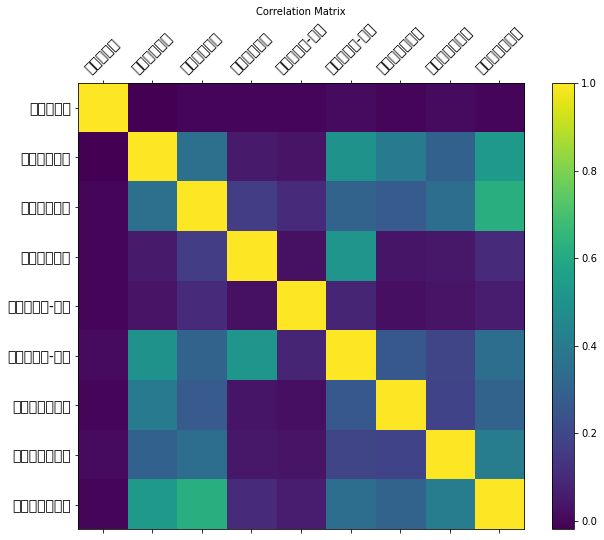

In [14]:
# pearson coefficient
corr = credit.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(credit.corr(), fignum=f.number)
plt.xticks(range(credit.select_dtypes(['number']).shape[1]), credit.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(credit.select_dtypes(['number']).shape[1]), credit.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

#  資料預處理

In [7]:
yushan = data[data['source'] == '玉證']
fugle = data[data['source'] == 'FUGLE']
yushan['y'] = yushan['quota_now'].apply(lambda x: to_class(x))
fugle['y'] = fugle['quota_now'].apply(lambda x: to_class(x))
fugle = fugle.drop('source', axis=1)
yushan = yushan.drop('source', axis=1)
fugle = fugle.drop('quota_now', axis=1)
yushan = yushan.drop('quota_now', axis=1)
fugle = fugle.drop('occupation', axis=1)
yushan = yushan.drop('occupation', axis=1)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# ---------------------------------------------------------------------------- #
#                                     fugle                                    #
# ---------------------------------------------------------------------------- #

X_fugle = fugle.iloc[:, :-1].values
Y_fugle = fugle.iloc[:, -1].values

# apply SelectKBest class to extract top 10 best features
top_k = 10
bestfeatures = SelectKBest(score_func=chi2, k=top_k)
fit = bestfeatures.fit(X_fugle, Y_fugle)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(fugle.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([df_columns, df_scores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(top_k, 'Score'))  # print 10 best feature
print('-'*80)
fugle_feature_list = featureScores.nlargest(3, 'Score')['Specs'].values

# ---------------------------------------------------------------------------- #
#                                    yushan                                    #
# ---------------------------------------------------------------------------- #

X_yushan = yushan.iloc[:, :-1].values
Y_yushan = yushan.iloc[:, -1].values

# apply SelectKBest class to extract top 10 best features
top_k = 10
bestfeatures = SelectKBest(score_func=chi2, k=top_k)
fit = bestfeatures.fit(X_yushan, Y_yushan)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(yushan.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([df_columns, df_scores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(top_k, 'Score'))  # print 10 best feature
print('-'*80)
yushan_feature_list = featureScores.nlargest(5, 'Score')['Specs'].values

print(f'fugle = {fugle_feature_list}')
print(f'yushan = {yushan_feature_list}')

fugle = fugle[fugle_feature_list]
yushan = yushan[yushan_feature_list]

                Specs        Score
8          incomeYear  3046.350831
9         totalWealth  1185.590946
3       expInvestment  1061.010717
1  hasOtherComAccount   285.595706
7         quotaCredit   237.580262
6          srcCapital   156.593642
5       frqInvestment   104.655171
2            eduLevel    93.995489
4       yrsInvestment     4.142721
0                 sex     4.070256
--------------------------------------------------------------------------------
                Specs         Score
3       expInvestment  14719.869644
8          incomeYear   6716.420262
9         totalWealth   6193.951002
7         quotaCredit   2714.129009
1  hasOtherComAccount   2696.629454
2            eduLevel    462.192553
5       frqInvestment    430.317080
0                 sex     88.069496
6          srcCapital     36.642621
4       yrsInvestment     11.617819
--------------------------------------------------------------------------------
fugle = ['incomeYear' 'totalWealth' 'expInvestment']
yush

<ipython-input-7-8d135945cd10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yushan['y'] = yushan['quota_now'].apply(lambda x: to_class(x))
<ipython-input-7-8d135945cd10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fugle['y'] = fugle['quota_now'].apply(lambda x: to_class(x))


In [9]:
from sklearn.model_selection import train_test_split
X_train_fugle, X_valid_fugle, Y_train_fugle, Y_valid_fugle = train_test_split(X_fugle, Y_fugle, test_size=0.33)
X_train_yushan, X_valid_yushan, Y_train_yushan, Y_valid_yushan = train_test_split(X_yushan, Y_yushan, test_size=0.33)

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_fugle, Y_train_fugle)
pred = clf.predict(X_valid_fugle)
(sum(np.equal(pred, Y_valid_fugle)))/len(Y_valid_fugle)

0.8406205227014476

In [18]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train_yushan, Y_train_yushan)
pred = clf.predict(X_valid_yushan)
(sum(np.equal(pred, Y_valid_yushan)))/len(Y_valid_yushan)

0.5001351838500361

# Linear Regression

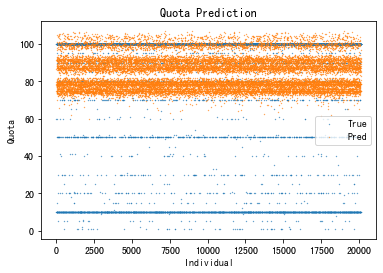

0.223239186592134

In [199]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_fugle, Y_train_fugle)
Y_pred_fugle = model.predict(X_valid_fugle)
plt.scatter(range(len(Y_pred_fugle)), Y_valid_fugle, s=0.1, label='True')
plt.scatter(range(len(Y_pred_fugle)), Y_pred_fugle, s=0.1, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_fugle = Y_pred_fugle - Y_valid_fugle
np.linalg.norm(Y_diff_fugle) / len(Y_diff_fugle)

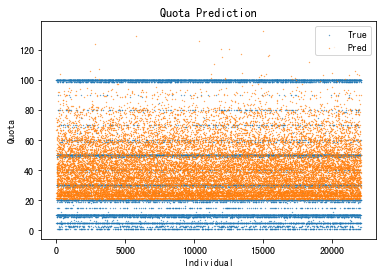

0.20544774848402203

In [200]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_yushan, Y_train_yushan)
Y_pred_yushan = model.predict(X_valid_yushan)
plt.scatter(range(len(Y_pred_yushan)), Y_valid_yushan, s=0.1, label='True')
plt.scatter(range(len(Y_pred_yushan)), Y_pred_yushan, s=0.1, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_yushan = Y_pred_yushan - Y_valid_yushan
np.linalg.norm(Y_diff_yushan) / len(Y_diff_yushan)

# Random Foreset

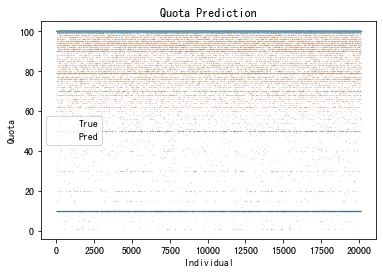

/Users/jack/miniconda3/envs/datasci/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


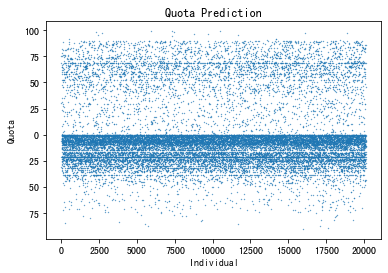

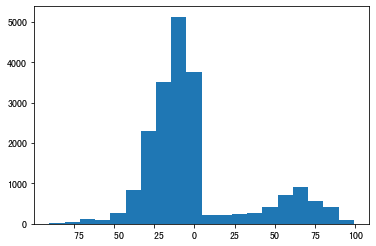

0.22906567093256455

In [201]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_fugle, Y_train_fugle)
Y_pred_fugle = model.predict(X_valid_fugle).astype(int)

plt.scatter(range(len(Y_pred_fugle)), Y_valid_fugle, s=0.01, label='True')
plt.scatter(range(len(Y_pred_fugle)), Y_pred_fugle, s=0.01, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_fugle = Y_pred_fugle - Y_valid_fugle
plt.scatter(range(len(Y_diff_fugle)), Y_diff_fugle, s=0.1)
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
# plt.legend()
plt.show()
plt.close()

plt.hist(Y_diff_fugle, bins=20)
plt.show()
plt.close()

np.linalg.norm(Y_diff_fugle) / len(Y_diff_fugle)

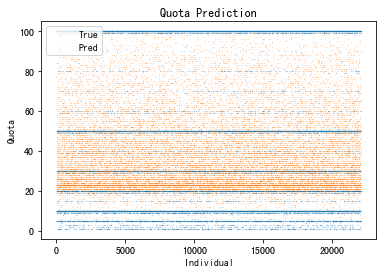

/Users/jack/miniconda3/envs/datasci/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


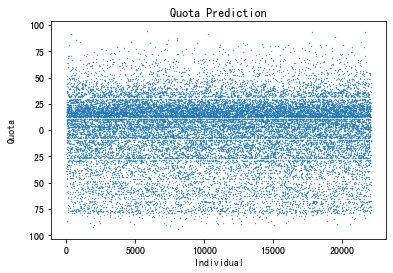

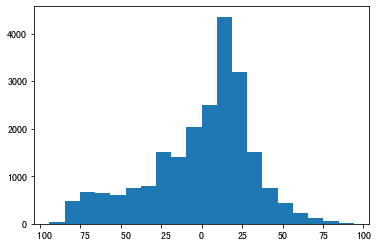

0.2148992494690477

In [202]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_yushan, Y_train_yushan)
Y_pred_yushan = model.predict(X_valid_yushan).astype(int)

plt.scatter(range(len(Y_pred_yushan)), Y_valid_yushan, s=0.01, label='True')
plt.scatter(range(len(Y_pred_yushan)), Y_pred_yushan, s=0.01, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_yushan = Y_pred_yushan - Y_valid_yushan
plt.scatter(range(len(Y_diff_yushan)), Y_diff_yushan, s=0.1)
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
# plt.legend()
plt.show()
plt.close()

plt.hist(Y_diff_yushan, bins=20)
plt.show()
plt.close()

np.linalg.norm(Y_diff_yushan) / len(Y_diff_yushan)